<a href="https://colab.research.google.com/github/emilios8/dw_matrix_road_sign/blob/master/M3D4_actu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [0]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
model = Sequential([
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

  Flatten(),          

  Dense(num_classes, activation='softmax')    
    
])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [7]:
model.fit(X_train, y_train)

1088/1088 [==============================] - 3s 3ms/step - loss: 4.0951 - accuracy: 0.8050


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

    Flatten(),          

    Dense(num_classes, activation='softmax')    
      
  ])

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data', (X_train, y_train)),
      callbacks=[tensorboard_callback]
  )

  return model

In [9]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 9ms/step - loss: 48.6991 - accuracy: 0.7545 - val_loss: 0.2217 - val_accuracy: 0.9516
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2378 - accuracy: 0.9472 - val_loss: 0.2155 - val_accuracy: 0.9524
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1552 - accuracy: 0.9656 - val_loss: 0.0866 - val_accuracy: 0.9780
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1034 - accuracy: 0.9755 - val_loss: 0.0860 - val_accuracy: 0.9817
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0914 - accuracy: 0.9786 - val_loss: 0.1003 - val_accuracy: 0.9749


In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):

  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [11]:
predict(model_trained, X_test, y_test)

0.8346938775510204

In [14]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),          

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')    
      
  ])

def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

train_and_predict( get_cnn_v2(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 4.1074 - accuracy: 0.2962 - val_loss: 1.3759 - val_accuracy: 0.6324
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 1.1674 - accuracy: 0.6571 - val_loss: 0.4429 - val_accuracy: 0.8998
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.5804 - accuracy: 0.8251 - val_loss: 0.1899 - val_accuracy: 0.9623
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.3653 - accuracy: 0.8916 - val_loss: 0.1001 - val_accuracy: 0.9790
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.2722 - accuracy: 0.9189 - val_loss: 0.0647 - val_accuracy: 0.9880


0.9231292517006803

In [15]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),          

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')    
      
  ])

def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

train_and_predict( get_cnn_v3(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 2.1248 - accuracy: 0.5658 - val_loss: 0.3204 - val_accuracy: 0.9237
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.4707 - accuracy: 0.8633 - val_loss: 0.0836 - val_accuracy: 0.9829
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2830 - accuracy: 0.9188 - val_loss: 0.0643 - val_accuracy: 0.9851
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1999 - accuracy: 0.9410 - val_loss: 0.0347 - val_accuracy: 0.9927
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1483 - accuracy: 0.9565 - val_loss: 0.0247 - val_accuracy: 0.9943


0.9723356009070295

In [20]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),          

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')    
      
  ])

def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

#get_cnn_v4(input_shape, num_classes).summary()
train_and_predict( get_cnn_v4(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.8001 - accuracy: 0.2445 - val_loss: 1.3525 - val_accuracy: 0.5528
Epoch 2/5
272/272 [==============================] - 3s 13ms/step - loss: 1.0313 - accuracy: 0.6833 - val_loss: 0.2485 - val_accuracy: 0.9332
Epoch 3/5
272/272 [==============================] - 3s 12ms/step - loss: 0.4770 - accuracy: 0.8513 - val_loss: 0.1362 - val_accuracy: 0.9663
Epoch 4/5
272/272 [==============================] - 3s 12ms/step - loss: 0.3076 - accuracy: 0.9053 - val_loss: 0.0731 - val_accuracy: 0.9807
Epoch 5/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2318 - accuracy: 0.9308 - val_loss: 0.0530 - val_accuracy: 0.9862


0.9639455782312926

In [46]:

def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(4, 4), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(4, 4), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.15),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.15),

    Conv2D(filters=64, kernel_size=(2, 2), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    MaxPool2D(),
    Dropout(0.15),

    Flatten(),          

    Dense(1024, activation='relu'),
    Dropout(0.15),

    Dense(1024, activation='relu'),
    Dropout(0.15),

    Dense(num_classes, activation='softmax')    
      
  ])

def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

#get_cnn_v4(input_shape, num_classes).summary()
train_and_predict( get_cnn_v5(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 1.8674 - accuracy: 0.4975 - val_loss: 0.4137 - val_accuracy: 0.8890
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.4111 - accuracy: 0.8772 - val_loss: 0.0969 - val_accuracy: 0.9741
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2115 - accuracy: 0.9379 - val_loss: 0.0656 - val_accuracy: 0.9823
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1697 - accuracy: 0.9497 - val_loss: 0.0377 - val_accuracy: 0.9893
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1207 - accuracy: 0.9646 - val_loss: 0.0366 - val_accuracy: 0.9896


0.9675736961451247

In [22]:
X_train[0].shape

(32, 32, 3)

Konwersja do jednego kanału. Do odcieni szarości.

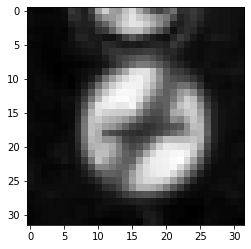

In [25]:
plt.imshow( color.rgb2gray( X_train[0] ), cmap=plt.get_cmap('gray') )

In [0]:
X_train_grey = color.rgb2gray( X_train ).reshape(-1, 32, 32, 1)
X_test_grey = color.rgb2gray( X_test ).reshape(-1, 32, 32, 1)

In [51]:
model = get_cnn_v5((32, 32, 1), num_classes)
model_trained = train_model(model, X_train_grey, y_train, params_fit={})
predict(model_trained, X_test_grey, y_test)

Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 2.2164 - accuracy: 0.3736 - val_loss: 0.4626 - val_accuracy: 0.8457
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.3367 - accuracy: 0.8894 - val_loss: 0.0916 - val_accuracy: 0.9752
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1289 - accuracy: 0.9588 - val_loss: 0.0437 - val_accuracy: 0.9873
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.0883 - accuracy: 0.9719 - val_loss: 0.0338 - val_accuracy: 0.9894
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.0645 - accuracy: 0.9789 - val_loss: 0.0201 - val_accuracy: 0.9943


0.962358276643991